In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**# Data Preprocessing**

**## Training Image Preprocessing**

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


**## Validation Image Processing**

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  ...

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     

**To avoid Overshooting**
1. Choose small learning rate default 0.001 but we are taking 0.0001
2. There may be chance of Underfitting, so increase number of neuron
3. Add more Convolution layer to extract more features from the images there may a possibility that the model is unable to capture relevant feature or the model is confusing due to lack of feature so feed with more features

**## Building Model**

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

In [8]:
## Building Convolution layer

In [9]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\varun\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Dropout(0.25)) #To avoid overfitting

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(units=1500,activation='relu'))

In [17]:
model.add(Dropout(0.4))

In [18]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

**## Compiling Model**

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

**###Model Training**

In [21]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2890s 1s/step - accuracy: 0.3795 - loss: 2.2092 - val_accuracy: 0.8401 - val_loss: 0.5077
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1162s 529ms/step - accuracy: 0.8337 - loss: 0.5219 - val_accuracy: 0.8906 - val_loss: 0.3485
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1150s 523ms/step - accuracy: 0.9047 - loss: 0.2943 - val_accuracy: 0.9383 - val_loss: 0.1862
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5540s 3s/step - accuracy: 0.9354 - loss: 0.1910 - val_accuracy: 0.9393 - val_loss: 0.1838
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1186s 540ms/step - accuracy: 0.9545 - loss: 0.1417 - val_accuracy: 0.9607 - val_loss: 0.1229
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1098s 500ms/step - accuracy: 0.9649 - loss: 0.1063 - val_accuracy: 0.9531 - val_loss: 0.1515
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1093s 497ms/step - accuracy: 0.9702 - loss: 0.0919 - val_accuracy: 0.9634 - val_loss: 0.1194
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1107s 504ms/step - 

**## Model Evaluation**

In [22]:
#Model evaluation on training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 250s 114ms/step - accuracy: 0.9901 - loss: 0.0318


In [23]:
print(train_loss,train_acc)

0.02820112742483616 0.9913649559020996


In [24]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 61s 111ms/step - accuracy: 0.9626 - loss: 0.1223


In [25]:
print(val_loss,val_acc)

0.12373990565538406 0.9631231427192688


**## Saving Model**

In [26]:
model.save("trained_model.keras")

In [42]:
model.save("trained_model.h5")

In [27]:
training_history.history

{'accuracy': [0.5899993181228638,
  0.8605875372886658,
  0.9132228493690491,
  0.941688597202301,
  0.9568105936050415,
  0.9660857915878296,
  0.9717192053794861,
  0.9757024049758911,
  0.9792872667312622,
  0.9824169278144836],
 'loss': [1.3948441743850708,
  0.4378918707370758,
  0.2661643922328949,
  0.17505855858325958,
  0.13327766954898834,
  0.10381574183702469,
  0.08571356534957886,
  0.07398340106010437,
  0.06509382277727127,
  0.05462001636624336],
 'val_accuracy': [0.8401433825492859,
  0.8906214237213135,
  0.9383109211921692,
  0.9392784237861633,
  0.9606760740280151,
  0.9531072378158569,
  0.9634076952934265,
  0.9590257406234741,
  0.9692124128341675,
  0.9631231427192688],
 'val_loss': [0.5077001452445984,
  0.3484576344490051,
  0.186248317360878,
  0.1837722510099411,
  0.12294461578130722,
  0.15151046216487885,
  0.11943455040454865,
  0.140675887465477,
  0.09552761167287827,
  0.12373993545770645]}

In [28]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [29]:
training_history.history['val_accuracy']

[0.8401433825492859,
 0.8906214237213135,
 0.9383109211921692,
 0.9392784237861633,
 0.9606760740280151,
 0.9531072378158569,
 0.9634076952934265,
 0.9590257406234741,
 0.9692124128341675,
 0.9631231427192688]

**#Accuracy Visualization**

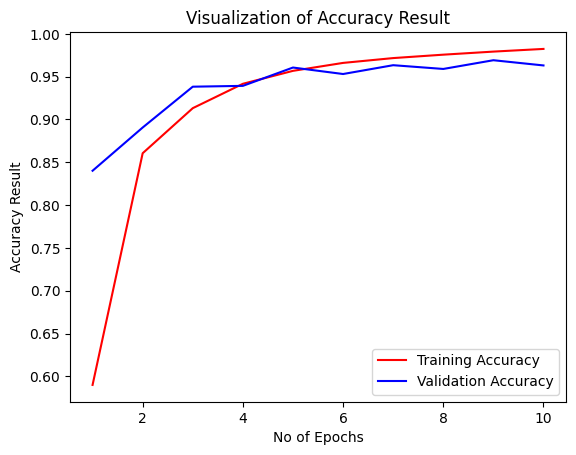

In [30]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

**## Some other mectrics for model evaluation**

In [31]:
class_name = validation_set.class_names

In [32]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [33]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 59s 108ms/step


(array([[9.99488235e-01, 1.82884577e-07, 1.34909461e-08, ...,
         8.75044750e-15, 1.14619563e-13, 1.58150164e-12],
        [9.99953747e-01, 2.94954134e-05, 4.96563757e-07, ...,
         8.84982463e-13, 6.31379150e-12, 5.19434407e-09],
        [1.00000000e+00, 7.40124021e-12, 2.53272698e-11, ...,
         1.00409580e-19, 2.31846020e-17, 7.63188124e-13],
        ...,
        [1.25897123e-12, 5.27608670e-16, 5.49409823e-11, ...,
         7.36067498e-14, 1.61804841e-14, 1.00000000e+00],
        [7.02993783e-12, 2.67721132e-15, 8.67457980e-11, ...,
         2.02053261e-12, 2.31259104e-13, 1.00000000e+00],
        [2.64583235e-20, 1.06059264e-20, 5.91891551e-21, ...,
         2.28865159e-19, 3.92376805e-18, 1.00000000e+00]], dtype=float32),
 (17572, 38))

In [34]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [35]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [36]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [37]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

**## Precision Recall**

In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.88      0.93       504
                                 Apple___Black_rot       0.99      0.95      0.97       497
                          Apple___Cedar_apple_rust       0.97      0.97      0.97       440
                                   Apple___healthy       0.87      0.97      0.92       502
                               Blueberry___healthy       0.96      0.99      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.96      0.98       421
                 Cherry_(including_sour)___healthy       0.99      0.98      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.93      0.94       410
                       Corn_(maize)___Common_rust_       1.00      0.99      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.96      0.

In [40]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[446,   3,   1, ...,   0,   1,   0],
       [  2, 473,   2, ...,   0,   0,   0],
       [  0,   0, 428, ...,   0,   0,   1],
       ...,
       [  0,   0,   0, ..., 477,   0,   0],
       [  0,   0,   0, ...,   0, 444,   1],
       [  0,   0,   0, ...,   0,   0, 480]], dtype=int64)

**## Confusion Matrix Visualization**

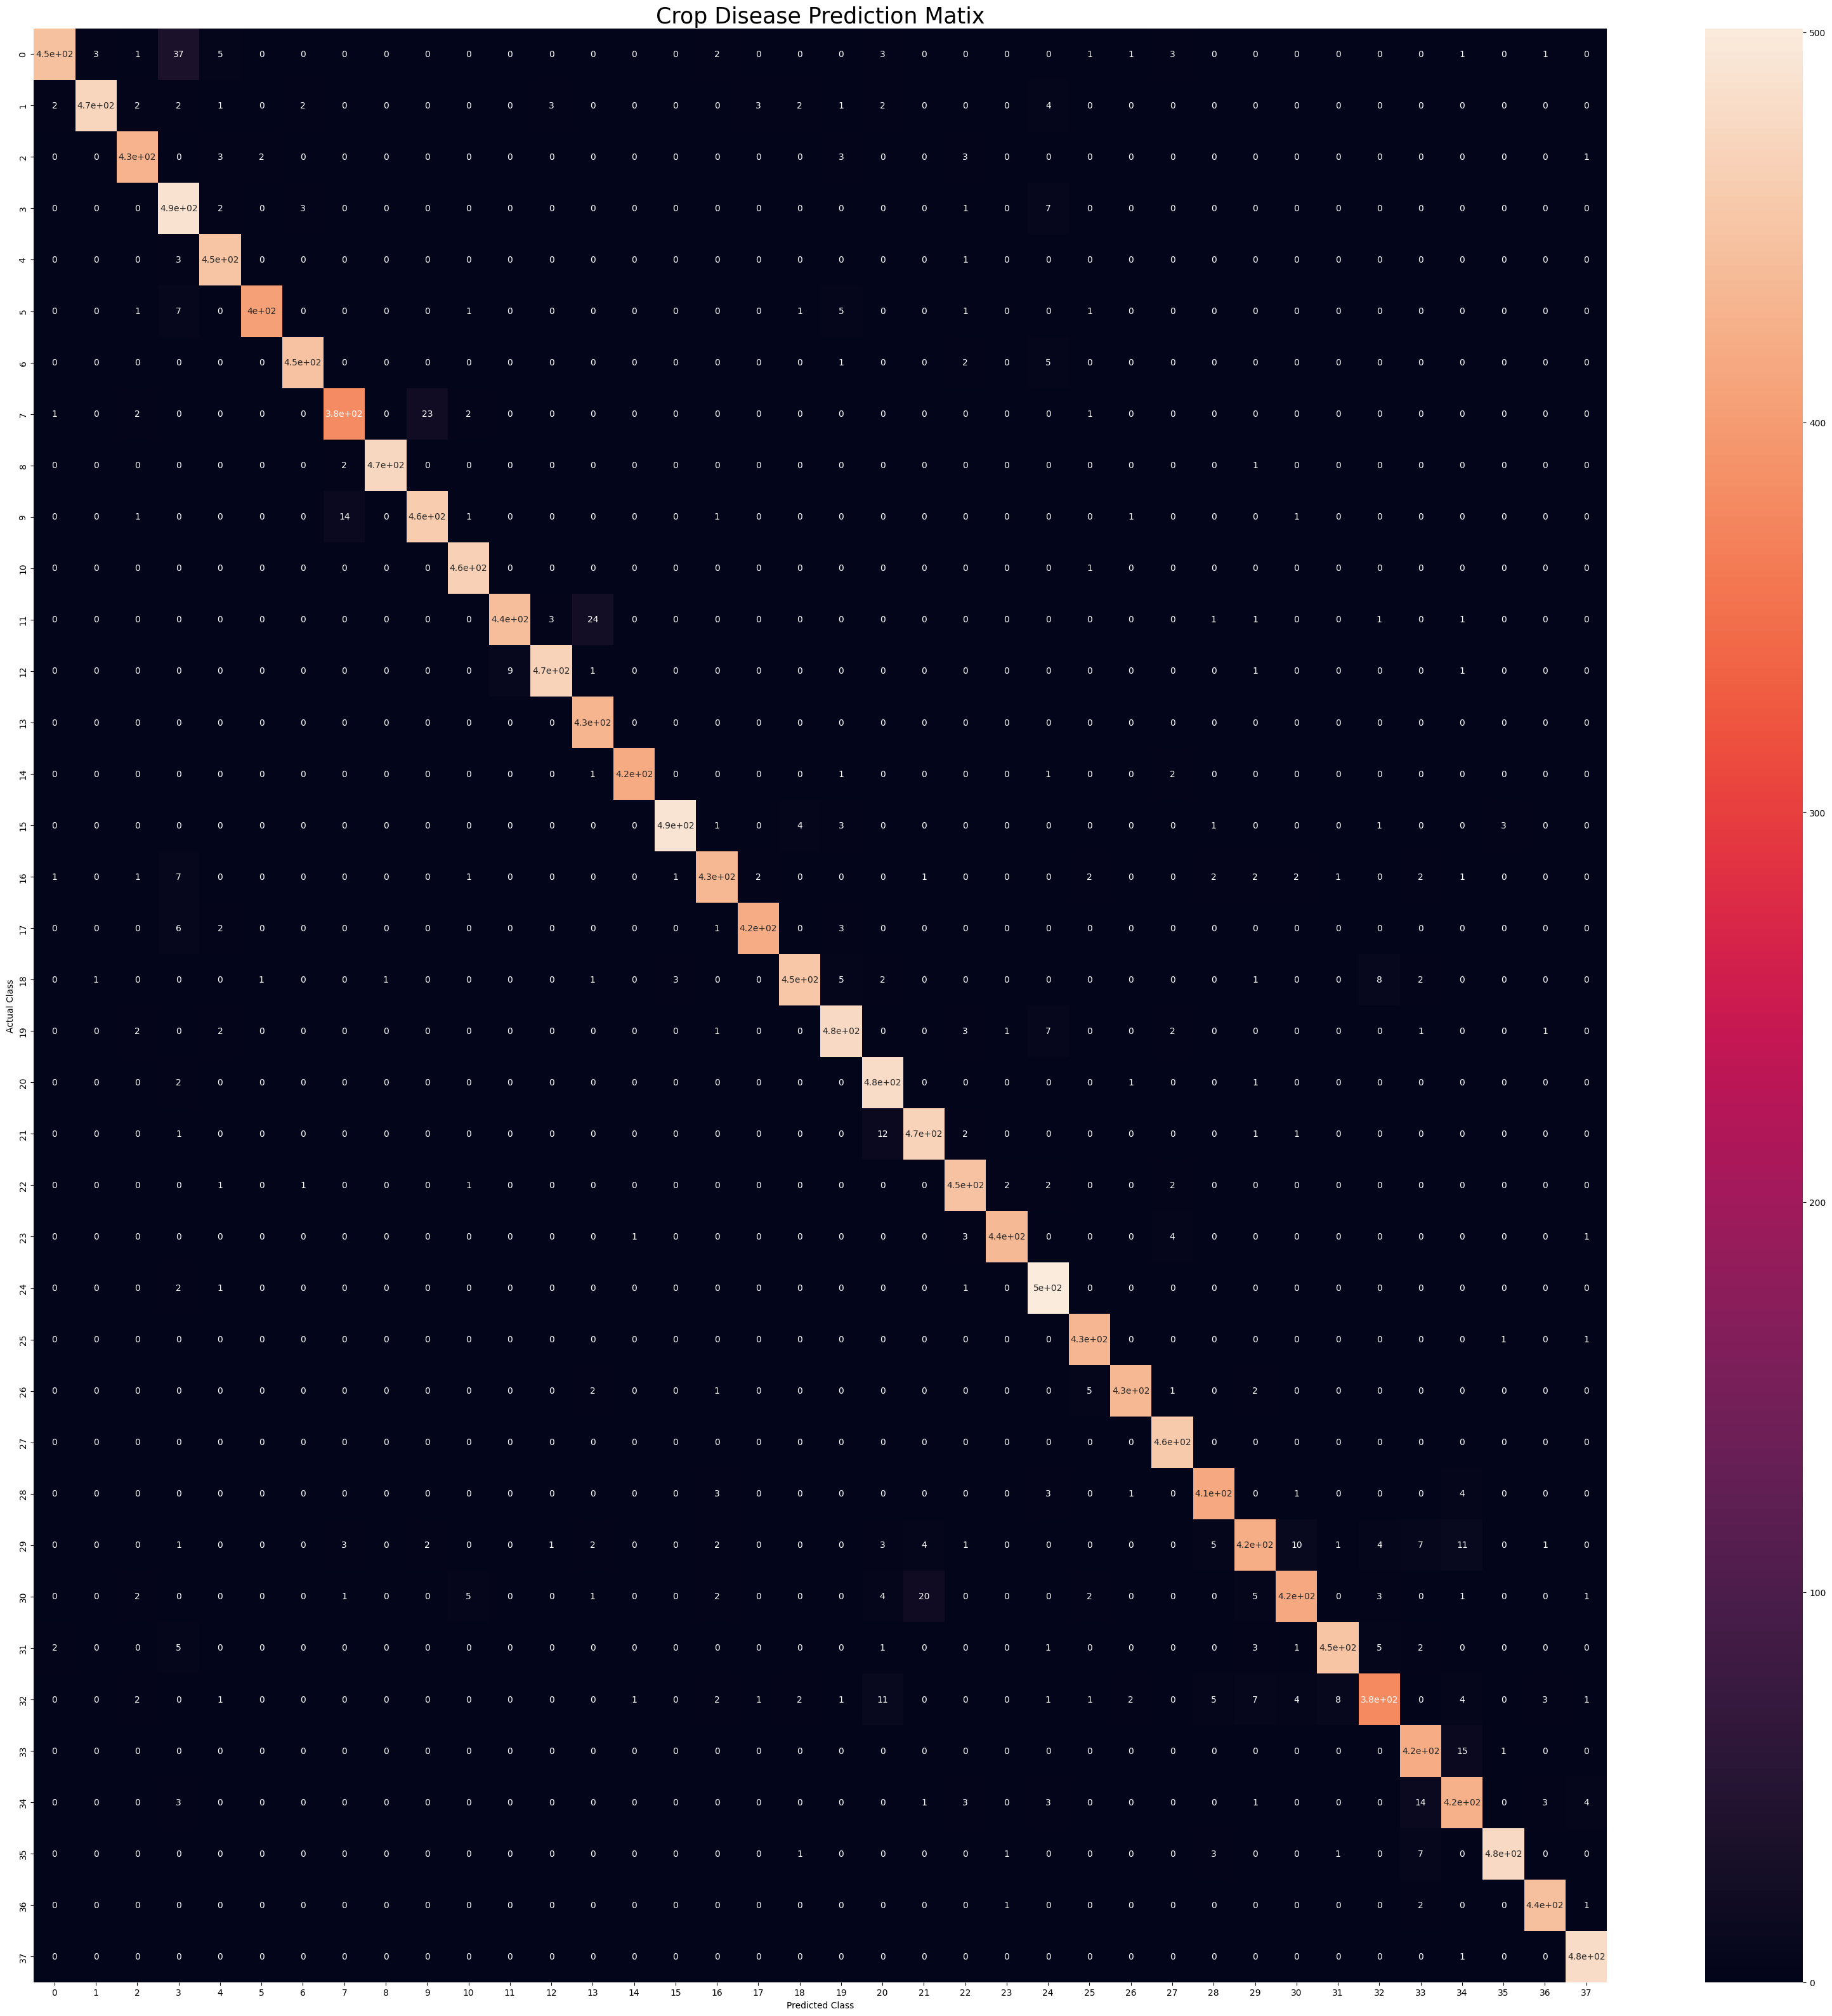

In [41]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Crop Disease Prediction Matix",fontsize=25)
plt.show()